In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score





In [7]:
data=pd.read_csv("BTC-USD_stock_data.csv")

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [8]:
data.shape

(2836, 7)

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
X=data[["Open","High","Low","Volume"]]
y=data["Close"]

In [11]:
X.shape,y.shape

((2836, 4), (2836,))

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2268, 4), (2268,), (568, 4), (568,))

In [14]:
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test)

In [16]:

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 201774.2736347351
R2 Score: 0.9992413486892241


C:\Users\ajeem\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


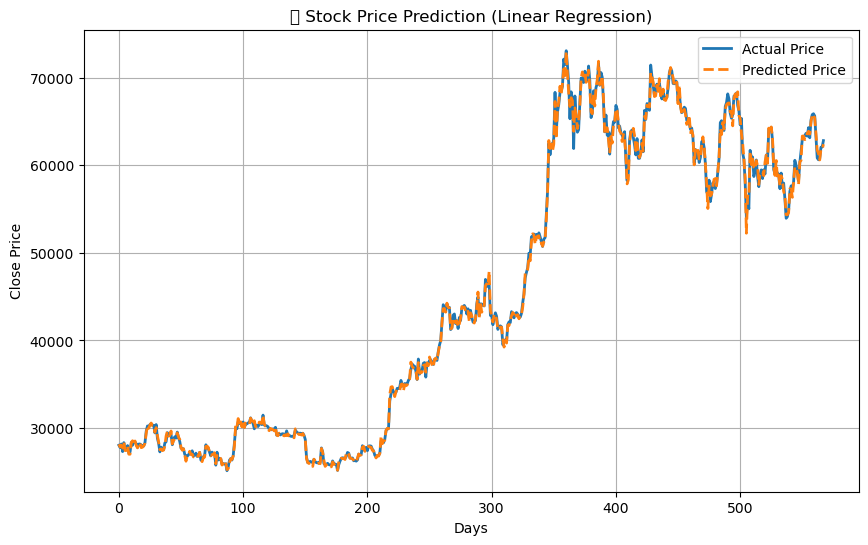

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linewidth=2, linestyle='--')
plt.title('📈 Stock Price Prediction (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import pickle

# Save trained model as model.pkl
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl
